## Summary
1. [Source code](#source-code)
2. [Conclusions](#conclusions)
3. [Authors](#authors)

<a name="source-code"></a>
## Source code

Python library imports

In [ ]:
from google.colab import drive
import pandas as pd
from fastai.tabular.all import *
from sklearn.model_selection import train_test_split

Dataset upload

In [ ]:
drive.mount('/content/drive')
file_path_deep_learning = "/content/drive/MyDrive/colab/deeplearning.json"
path = "/content/drive/MyDrive/colab/"
df = pd.read_json(file_path_deep_learning,lines=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(df.columns.tolist())

['state', 'address', 'attributes', 'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'postal_code', 'stars', 'category_count', 'hours_count', 'attributes_count', 'business_accepts_credit_cards', 'business_parking', 'name_state', 'population', 'average_salary', 'high_quality', 'review_count', 'positive_reviews', 'negative_reviews']


We use a sample of the original json (speed up the training process)

Delete columns that generates errors when training the Neuronal Network (unhashable list)

In [ ]:
df = df.drop(columns=["attributes", "categories", "hours", "address", "name", "postal_code", "name_state", "high_quality"],axis=1)

In [ ]:
train, temp = train_test_split(df, test_size=0.15) #  85% training, 15% for test

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77338 entries, 0 to 77337
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          77338 non-null  object 
 1   city                           77338 non-null  object 
 2   is_open                        77338 non-null  int64  
 3   latitude                       77338 non-null  float64
 4   longitude                      77338 non-null  float64
 5   stars                          77338 non-null  float64
 6   category_count                 77338 non-null  float64
 7   hours_count                    77338 non-null  float64
 8   attributes_count               77338 non-null  int64  
 9   business_accepts_credit_cards  77338 non-null  int64  
 10  business_parking               77338 non-null  int64  
 11  population                     77338 non-null  float64
 12  average_salary                 77338 non-null 

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65737 entries, 27127 to 44186
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          65737 non-null  object 
 1   city                           65737 non-null  object 
 2   is_open                        65737 non-null  int64  
 3   latitude                       65737 non-null  float64
 4   longitude                      65737 non-null  float64
 5   stars                          65737 non-null  float64
 6   category_count                 65737 non-null  float64
 7   hours_count                    65737 non-null  float64
 8   attributes_count               65737 non-null  int64  
 9   business_accepts_credit_cards  65737 non-null  int64  
 10  business_parking               65737 non-null  int64  
 11  population                     65737 non-null  float64
 12  average_salary                 65737 non-n

We generate the continous and categorial columns and we select the column we want to predict

In [ ]:
stars = 'stars'
procs = [Categorify, FillMissing, Normalize]
# define columns that are continuous / categorical
cont,cat = cont_cat_split(train, 1, dep_var=stars)

In [ ]:
cont

['is_open',
 'latitude',
 'longitude',
 'category_count',
 'hours_count',
 'attributes_count',
 'business_accepts_credit_cards',
 'business_parking',
 'population',
 'average_salary',
 'review_count',
 'positive_reviews',
 'negative_reviews']

In [ ]:
cat

['state', 'city']

In [ ]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train))

In [ ]:
dls=TabularDataLoaders.from_df(train, path,
                               procs=procs,
                               cat_names=cat,
                               cont_names=cont,
                               y_names = stars,
                               splits=splits,
                               bs=64)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


In [ ]:
dls.show_batch()

,state,city,is_open,latitude,longitude,category_count,hours_count,attributes_count,business_accepts_credit_cards,business_parking,population,average_salary,review_count,positive_reviews,negative_reviews,stars
0,AZ,Tucson,-8.908128e-09,32.293224,-110.970855,5.0,46.010463,3.000000,1.000000e+00,1.000000e+00,7.359197e+06,50929.999974,14.000001,6.000000e+00,8.000000,4.5
1,IL,Shiloh,1.000000e+00,38.570232,-89.943764,5.0,46.010463,1.000000,3.974282e-08,1.000000e+00,1.258203e+07,55130.000070,11.000000,3.000000e+00,8.000000,4.0
2,PA,Philadelphia,1.000000e+00,39.956478,-75.206528,9.0,16.026163,21.000000,1.000000e+00,1.000000e+00,1.297201e+07,51340.000095,117.500001,6.850000e+01,49.000001,3.5
3,NV,Reno,1.000000e+00,39.483566,-112.125374,10.5,46.010463,2.000000,3.974282e-08,1.000000e+00,3.177772e+06,47210.000024,6.000001,6.526782e-07,6.000000,5.0
4,ID,Boise,1.000000e+00,43.640651,-112.125374,2.0,46.010463,23.000000,1.000000e+00,1.000000e+00,1.939033e+06,44889.999804,57.000001,4.400000e+01,18.000000,2.5
5,TN,Bellevue,1.000000e+00,36.045765,-86.954033,8.0,75.000001,16.000000,1.000000e+00,1.000000e+00,7.051339e+06,45650.000056,42.000000,2.000000e+01,26.000000,4.0
6,FL,Clearwater,1.000000e+00,27.960760,-82.800270,4.0,46.010463,1.000000,3.974282e-08,1.000000e+00,2.218046e+07,47750.000048,5.000001,3.000000e+00,2.000000,4.0
7,TN,Nashville,-8.908128e-09,36.157738,-86.768524,9.0,30.000001,21.000000,1.000000e+00,1.000000e+00,7.051339e+06,45650.000056,107.000002,1.600000e+01,49.000001,5.0
8,NV,Reno,-8.908128e-09,39.521568,-112.125374,5.0,45.000000,14.000000,1.000000e+00,-1.528809e-08,3.177772e+06,47210.000024,5.000001,2.000000e+00,3.000000,4.0
9,MO,Saint Louis,-8.908128e-09,38.593517,-90.225975,10.0,27.000000,27.999999,1.000000e+00,1.000000e+00,6.177957e+06,47819.999961,117.500001,6.850000e+01,49.000001,4.0


In [ ]:
learn = tabular_learner(dls,layers=[200,100], metrics=[mae, mse, R2Score()], config=tabular_config(ps=[0.001, 0.01], embed_p=0.04, use_bn=True)  # Dropout and batch normalization
)
learn.fit_one_cycle(4)

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


epoch,train_loss,valid_loss,mae,mse,r2_score,time
0,0.347530,0.255219,0.389376,0.255219,0.663619,00:16
1,0.255155,0.187258,0.337185,0.187258,0.753191,00:17
2,0.207448,0.175193,0.322429,0.175193,0.769094,00:19
3,0.191751,0.170267,0.319645,0.170267,0.775586,00:19


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)
/usr

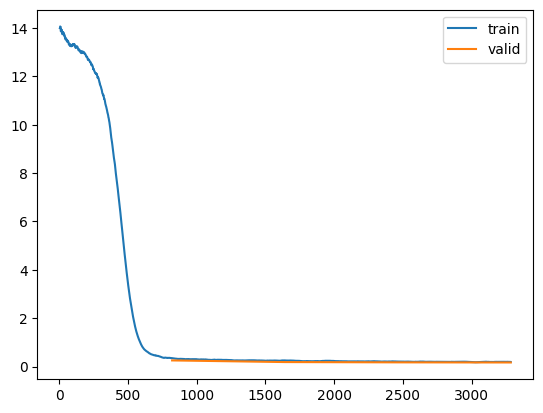

In [ ]:
learn.recorder.plot_loss()

In [ ]:
learn.show_results()

/usr/local/lib/python3.10/dist-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


,state,city,is_open,latitude,longitude,category_count,hours_count,attributes_count,business_accepts_credit_cards,business_parking,population,average_salary,review_count,positive_reviews,negative_reviews,stars,stars_pred
0,15.0,624.0,0.635293,0.774448,0.959377,-0.376853,-1.449703,1.707026,0.193234,0.329162,0.288322,0.504129,1.945858,1.926718,1.875769,4.5,3.961199
1,6.0,68.0,0.635293,1.520657,-2.054448,-1.255372,1.186803,-1.173194,0.193234,0.329162,-1.421642,-1.190040,-0.811035,-0.839460,-0.688982,4.0,3.875607
2,15.0,624.0,0.635293,0.808736,0.972836,0.940925,-0.500009,0.335492,0.193234,0.329162,0.288322,0.504129,-0.582353,-0.753687,-0.280954,4.0,4.125816
3,5.0,586.0,0.635293,-1.661677,0.347503,-0.816113,1.555914,-0.487428,0.193234,-3.038013,1.715509,-0.438827,-0.429898,0.018270,-0.980431,2.0,1.502175
4,6.0,68.0,0.635293,1.519687,-2.054448,2.478333,-0.500009,1.844179,0.193234,0.329162,-1.421642,-1.190040,0.865969,1.433524,0.418524,3.0,3.316757
5,4.0,943.0,0.635293,0.744195,0.928742,-0.816113,-0.711481,-1.173194,0.193234,-3.038013,-1.564328,1.299995,-0.556944,-0.882346,-0.047795,4.5,4.656579
6,15.0,399.0,0.635293,0.833598,0.948871,0.501665,-0.395100,-0.898888,0.193234,0.329162,0.288322,0.504129,-0.785626,-0.667914,-0.863852,2.5,2.559886
7,15.0,516.0,0.635293,0.828455,0.991438,-1.255372,-0.500009,0.609799,0.193234,0.329162,0.288322,0.504129,-0.633171,-0.539254,-0.688982,4.0,3.301775
8,15.0,871.0,0.635293,0.776365,0.952210,-0.376853,-0.500009,-0.487428,-5.175062,0.329162,0.288322,0.504129,-0.353670,-0.153276,-0.514113,3.5,2.783969


In [ ]:
test_dl = dls.test_dl(temp, bs=64)

In [ ]:
loss, mae, mse, r2 = learn.validate(dl=test_dl)
print(f"Loss: {loss}, MAE: {mae}, MSE: {mse}, R2 Score: {r2}")

<a name="conclusions"></a>
## Conclusions

## Analysis of validation

1. Loss: 0.16748248040676117

* The loss represents the discrepancy between the predicted values and the actual target values. In regression problems (predicting numerical values), a lower loss indicates better performance. Here, the loss is approximately 0.167, which suggests that, on average, the predicted values are relatively close to the actual values during training.

2. MAE (Mean Absolute Error): 0.31762611865997314

* MAE is a metric that measures the average absolute difference between predicted and actual values. It gives an idea of how far off, on average, the predictions are from the true values. In this case, the average absolute error is approximately 0.318, indicating that, on average, the predictions are off by around 0.318 units.

3. MSE (Mean Squared Error): 0.16748248040676117

* MSE is another measure of the average squared difference between predicted and actual values. It penalizes larger errors more than smaller ones. The MSE value here matches the loss, indicating that the loss function used is likely MSE.

4. R2 Score: 0.7784602865093495

* The R2 score, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates perfect predictions. An R2 score of 0.778 indicates that the model is able to explain approximately 77.8% of the variance in the target variable, which is a good performance.

## Analysis of validation vs training results

### Validation Metrics:

* Loss: 0.16748248040676117
* MAE: 0.31762611865997314
* MSE: 0.16748248040676117
* R2 Score: 0.7784602865093495

### Training Metrics (Last Epoch):
* Train Loss: 0.191751
* Valid Loss: 0.170267
* MAE: 0.319645
* MSE: 0.170267
* R2 Score: 0.775586
* Time: 00:19 (Time taken for the epoch)

### Analysis

1. Loss
* The training loss (0.191751) is slightly higher than the validation loss (0.167482), indicating that the model performs slightly worse on the training set compared to the validation set. This suggests that the model might be overfitting to some extent.

2. MAE and MSE
* The MAE (0.319645) and MSE (0.170267) on the training set are higher than the corresponding validation metrics (MAE: 0.317626, MSE: 0.167482). This suggests that, on average, predictions on the training set have slightly higher errors compared to the validation set.

3. R2 Score
* The R2 score on the training set (0.775586) is slightly lower than the R2 score on the validation set (0.778460). This implies that the model's ability to explain the variance in the target variable is slightly lower on the training set compared to the validation set.

3. Time
* The time taken for each epoch is provided. It's essential to monitor the training time to ensure efficient model training. In this case, the time is consistent across epochs.

### Considerations
1. Overfitting
* The model might be overfitting to the training data, as evidenced by the higher training loss and metrics compared to the validation set. Regularization techniques or adjustments to model complexity could help mitigate overfitting.

2. Training Efficiency
* The training time is consistent, indicating stable training. If training time becomes excessively long or fluctuates, it might be worth investigating.

<a name="authors"></a>
## Authors

Carlos Isaac: cip1@alumnes.udl.cat

Jordi Lazo: jlf4@alumnes.udl.cat